<a href="https://colab.research.google.com/github/GuilhermeOliveiraAgenor/Analise-Seguranca-Curitiba/blob/feature%2Fguilherme/guilherme/analise_seguran%C3%A7a_guilherme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt

# Faz upload do arquivo do seu PC
uploaded = files.upload()

# Pega o nome do arquivo enviado
file_path = list(uploaded.keys())[0]


Saving Dados_2024-2025 v3.xlsx to Dados_2024-2025 v3.xlsx


In [3]:
#Lista planilhas do arquivo
xls = pd.ExcelFile(file_path)
print("Planilhas do arquivo:")
for sheet_name in xls.sheet_names:
    print(sheet_name)

Planilhas do arquivo:
CTBA_2024
CTBA_2025
RM_2024
1_SEM_2024_RM
1_SEM_2025_RM
2_SEM_2024_RM
RM_2025
GERAL_2024
GERAL_2025


In [4]:
#selecionar planilha

base_2024 = ['CTBA_2024']
base_2025 = ['CTBA_2025']

In [5]:
# filtros por semestre
semestre1_inicio, semestre1_fim = 1,6
semestre2_inicio, semestre2_fim = 7,12


In [6]:
# Ler apenas as planilha 2024
dt = pd.read_excel(file_path, sheet_name=base_2024)
base = base_2024

In [ ]:
# Ler apenas planilha 2025
dt = pd.read_excel(file_path, sheet_name=base_2025)
base = base_2025

In [7]:
# Lista de crimes perigosos
crimes_perigosos = [
    'FURTO SIMPLES',
    'FURTO QUALIFICADO',
    'ROUBO',
    'DROGAS PARA O CONSUMO PESSOAL',
    'DANO',
    'ROUBO AGRAVADO',
    'VIOLACAO DE DOMICILIO',
    'FURTO DE COISA COMUM',
    'PORTE ILEGAL DE ARMA DE FOGO, ACESSORIO OU MUNICAO - USO PERMITIDO',
    'EXTORSAO MEDIANTE SEQUESTRO',
    'ROUBO COM RESULTADO DE LESAO CORPORAL GRAVE',
    'COMERCIO ILEGAL DE ARMA DE FOGO'
]

df_crimes_perigosos = dt[base[0]][dt[base[0]]['Natureza'].isin(crimes_perigosos)]



In [8]:
# Lista de tipos de furtos

furtos = [
    'FURTO SIMPLES', 'FURTO QUALIFICADO', 'FURTO DE COISA COMUM',
]

In [9]:
# Lista de tipos de roubos

roubos = [
    'ROUBO', 'ROUBO AGRAVADO','ROUBO COM RESULTADO DE LESAO CORPORAL GRAVE'
]

In [10]:
furtos_roubos = [
    'FURTO SIMPLES', 'FURTO QUALIFICADO', 'FURTO DE COISA COMUM','ROUBO', 'ROUBO AGRAVADO','ROUBO COM RESULTADO DE LESAO CORPORAL GRAVE'
]

In [11]:
crimes_violentos = [
    'ROUBO','ROUBO AGRAVADO','EXTORSAO MEDIANTE SEQUESTRO','ROUBO COM RESULTADO DE LESAO CORPORAL GRAVE'
]

In [12]:
crimes_comercio = [
    'FURTO SIMPLES',
    'FURTO QUALIFICADO',
    'ROUBO',
    'DANO',
    'ROUBO AGRAVADO',
    'VIOLACAO DE DOMICILIO',
    'FURTO DE COISA COMUM',
    'ROUBO COM RESULTADO DE LESAO CORPORAL GRAVE',
]

df_crimes_comercio = dt[base[0]][dt[base[0]]['Natureza'].isin(crimes_comercio)]


Natureza
FURTO SIMPLES                                                         36823
FURTO QUALIFICADO                                                     10651
PERTURBACAO DO TRABALHO OU SOSSEGO ALHEIO                             10406
ROUBO                                                                  5365
DROGAS PARA O CONSUMO PESSOAL                                          5080
DANO                                                                   3805
ROUBO AGRAVADO                                                         2253
VIOLACAO DE DOMICILIO                                                  1575
FURTO DE COISA COMUM                                                    683
PORTE ILEGAL DE ARMA DE FOGO, ACESSORIO OU MUNICAO - USO PERMITIDO      152
EXTORSAO MEDIANTE SEQUESTRO                                              34
ROUBO COM RESULTADO DE LESAO CORPORAL GRAVE                              31
COMERCIO ILEGAL DE ARMA DE FOGO                                           5
Nam

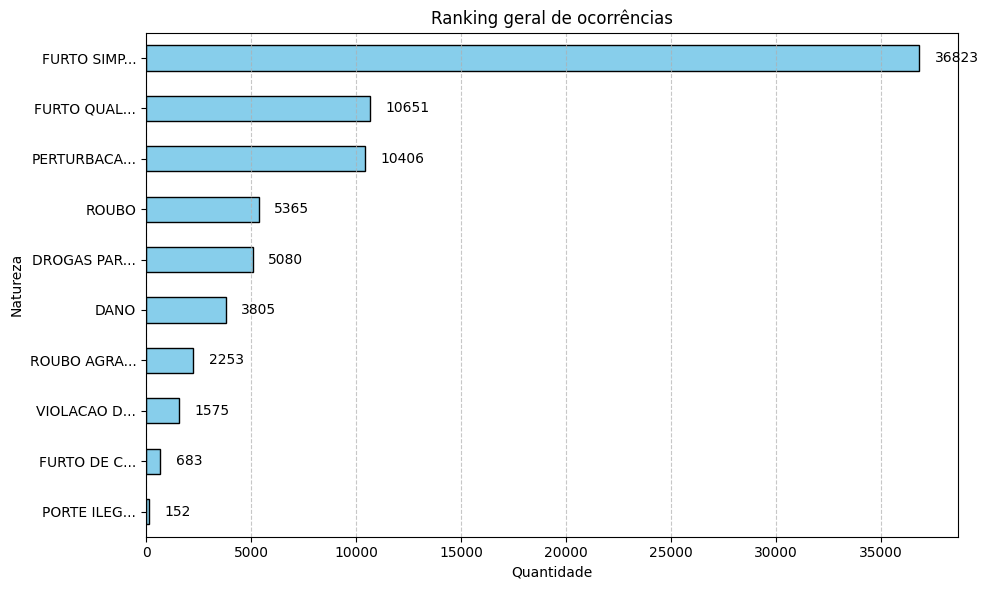

In [59]:
#Lista ranking de ocorrências no geral

ranking_geral = dt[base[0]]['Natureza'].value_counts()

print(ranking_geral)
print("\nTotal de ocorrências:", ranking_geral.sum())

ranking_top20 = ranking_geral.head(10)
ranking_top20.index = [label[:20] + '...' if len(label) > 20 else label for label in ranking_top20.index]

# Limita os rótulos de 'Natureza' a 10 caracteres
ranking_top10 = ranking_geral.head(10)
ranking_top10.index = [label[:10] + '...' if len(label) > 10 else label for label in ranking_top10.index]

# Cria o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
ranking_top10.plot(
    kind='barh',
    color='skyblue',
    edgecolor='black'
)

plt.title('Ranking geral de ocorrências')
plt.xlabel('Quantidade')
plt.ylabel('Natureza')

# Inverte o eixo Y para mostrar o maior no topo
plt.gca().invert_yaxis()

# Adiciona rótulos nas barras com espaçamento maior
for i, v in enumerate(ranking_top10):
    plt.text(v + (ranking_top10.max() * 0.02), i, str(v), va='center', fontsize=10)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Listar ranking de ocorrências por crime

crime = 'FURTO QUALIFICADO'

df_filtrado = dt[base[0]][dt[base[0]]['Natureza'] == crime]

ranking_filtrado = df_filtrado['Natureza'].value_counts()
print(ranking_filtrado)


NameError: name 'dt' is not defined

In [ ]:
# Quantidade de crimes por bairro no geral

quantidade_crimes_bairros = dt[base[0]]['Bairro'].value_counts().reset_index(name='Crimes')
print(quantidade_crimes_bairros.head(50))

                           Bairro  Crimes
0                          CENTRO   10732
1   CIDADE INDUSTRIAL DE CURITIBA    5117
2                   SITIO CERCADO    3699
3                      AGUA VERDE    3153
4                       BOQUEIRAO    2691
5                       TATUQUARA    2683
6                        REBOUCAS    2383
7                     PINHEIRINHO    2203
8                          PORTAO    2202
9                          CAJURU    2069
10                        UBERABA    1857
11                          BATEL    1737
12                     NOVO MUNDO    1558
13                          XAXIM    1461
14                     CAPAO RASO    1419
15                          HAUER    1347
16                  SAO FRANCISCO    1196
17                JARDIM BOTANICO    1139
18                     BIGORRILHO    1114
19               CAMPO DE SANTANA    1010
20                     ALTO DA XV     958
21                     CRISTO REI     955
22                         MERCES 

                           Bairro  Ranking  Crimes
0   CIDADE INDUSTRIAL DE CURITIBA        1    1205
1                          CENTRO        2     996
2                       TATUQUARA        3     510
3                   SITIO CERCADO        4     318
4                     PRADO VELHO        5     262
5                   SAO FRANCISCO        6     158
6                        SAO BRAZ        7     145
7                         PAROLIN        8     132
8                      PILARZINHO        9      86
9                          CAJURU       10      65
10               SANTA FELICIDADE       11      60
11                         PORTAO       12      57
12                     NOVO MUNDO       13      51
13                         GUAIRA       14      51
14                          ATUBA       15      46
15                     FAZENDINHA       16      45
16                     CAPAO RASO       17      44
17                      BOQUEIRAO       18      41
18                        UBERA

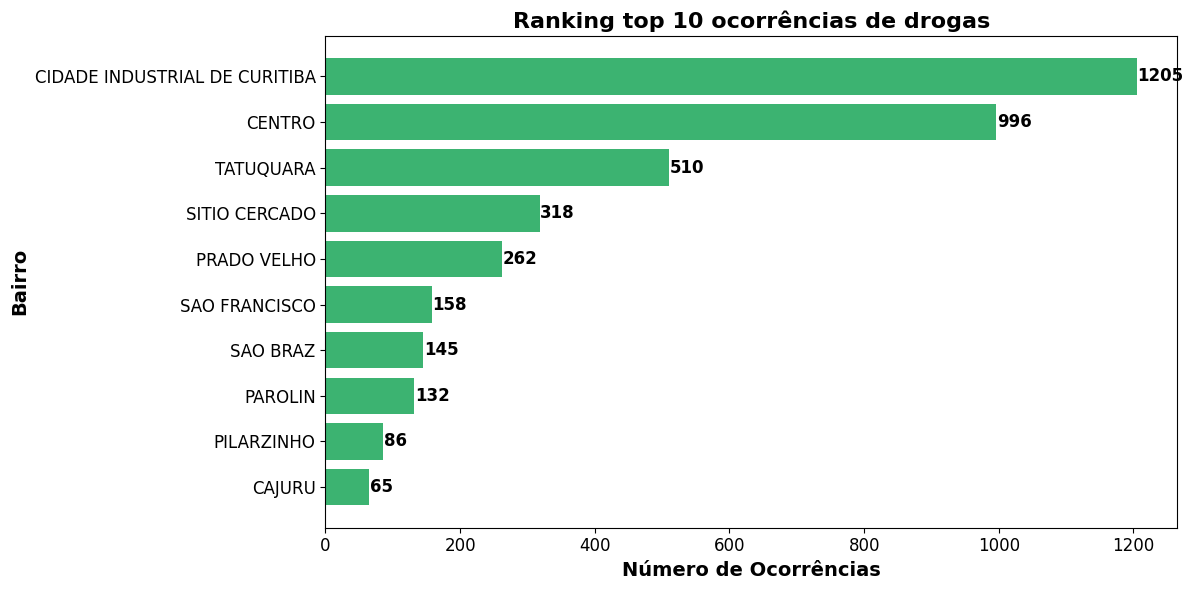

In [64]:
import matplotlib.pyplot as plt

crime = 'DROGAS PARA O CONSUMO PESSOAL'

# Filtra o crime selecionado
df_filtrado = dt[base[0]][dt[base[0]]['Natureza'] == crime]

# Contar os campos
quantidade_crimes_bairros = df_filtrado['Bairro'].value_counts().reset_index(name='Crimes')
quantidade_crimes_bairros.columns = ['Bairro', 'Crimes']

# Adiciona coluna Ranking iniciando em 1
quantidade_crimes_bairros['Ranking'] = range(1, len(quantidade_crimes_bairros) + 1)

# Reorganiza as colunas: Ranking, Bairro, Crimes
quantidade_crimes_bairros = quantidade_crimes_bairros[['Bairro','Ranking', 'Crimes']]

# Exibe os top 40 com ranking
print(quantidade_crimes_bairros.head(40))

# Seleciona os top 10 bairros
top10_bairros = quantidade_crimes_bairros.head(10)

# Cria o gráfico
plt.figure(figsize=(12, 6))
plt.barh(top10_bairros['Bairro'], top10_bairros['Crimes'], color='mediumseagreen')

# Adiciona os valores ao lado das barras
for i, (bairro, contagem) in enumerate(zip(top10_bairros['Bairro'], top10_bairros['Crimes'])):
    plt.text(contagem + 1, i, str(contagem), va='center', fontsize=12, fontweight='bold')

# Personalização
plt.xlabel('Número de Ocorrências', fontsize=14, fontweight='bold')
plt.ylabel('Bairro', fontsize=14, fontweight='bold')
plt.title(f'Ranking top 10 ocorrências de drogas', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().invert_yaxis()  # bairro com mais ocorrências no topo
plt.tight_layout()
plt.show()


In [ ]:
# Quantidade de crimes nos dias da semana por crime e bairro

crime = 'ROUBO'
bairro = 'MERCES'

# Filtrar o crime e bairro
df_filtrado = dt[base[0]][
    (dt[base[0]]['Natureza'] == crime) &
    (dt[base[0]]['Bairro'] == bairro)
]

# Contagem de crimes por dia da semana
crimes_por_dia_semana = df_filtrado['Dia da Semana'].value_counts().reset_index()
crimes_por_dia_semana.columns = ['Dia da Semana', 'Quantidade']

print(crimes_por_dia_semana)


  Dia da Semana  Quantidade
0           ter           9
1           sáb           8
2           qua           8
3           seg           7
4           qui           6
5           dom           6
6           sex           5


In [ ]:
# Quantidade de crimes nos periodos por crime e bairro

crime = 'FURTO SIMPLES'
bairro = 'CENTRO'

df_filtrado = dt[base[0]][
    (dt[base[0]]['Natureza'] == crime) &
    (dt[base[0]]['Bairro'] == bairro)
]

def periodo(hora):
    if 6 <= hora <= 11:
        return 'Manhã'
    elif 12 <= hora <= 17:
        return 'Tarde'
    else:
        return 'Noite'

# Criar coluna
df_filtrado['Periodo'] = df_filtrado['Hora'].apply(periodo)

# Contagem de crimes
crimes_por_periodo = df_filtrado['Periodo'].value_counts().reset_index()
crimes_por_periodo.columns = ['Periodo', 'Quantidade']

print(f"Crime: {crime} no bairro: {bairro}")
print(crimes_por_periodo)


Crime: FURTO SIMPLES no bairro: CENTRO
  Periodo  Quantidade
0   Tarde        2345
1   Noite        2218
2   Manhã        1300


/tmp/ipython-input-1332852174.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Periodo'] = df_filtrado['Hora'].apply(periodo)


In [24]:
import matplotlib.pyplot as plt

df = dt[base[0]][['Bairro', 'Natureza']]

# Contagem dos campos
contagem = df.value_counts(subset=['Bairro', 'Natureza']).reset_index(name='Contagem')

principal_crime_bairro = contagem.loc[
    contagem.groupby('Bairro')['Contagem'].idxmax()
].reset_index(drop=True)

principal_crime_bairro['Natureza'] = principal_crime_bairro['Natureza'].str.slice(0, 15)

# Ordena por ordem decrescente
ranking_top10 = principal_crime_bairro.sort_values(by='Contagem', ascending=False).head(10)

print(ranking_top10)

# ================================
# Gráfico de lista (barras horizontais)
# ================================
plt.figure(figsize=(10, 6))
plt.barh(ranking_top10['Bairro'], ranking_top10['Contagem'], color='steelblue')

# Adiciona o tipo de crime ao lado de cada barra
for i, (bairro, crime, contagem) in enumerate(zip(ranking_top10['Bairro'], ranking_top10['Natureza'], ranking_top10['Contagem'])):
    plt.text(contagem + 1, i, crime, va='center', fontsize=9, color='darkred')

# Personalização do gráfico
plt.xlabel('Número de Ocorrências')
plt.ylabel('Bairro')
plt.title('📊 Top 10 Principal Crime por Bairro')
plt.gca().invert_yaxis()  # bairro com mais ocorrências no topo
plt.tight_layout()
plt.show()


                           Bairro         Natureza  Contagem
28                         CENTRO    FURTO SIMPLES      5863
2                      AGUA VERDE    FURTO SIMPLES      1953
54                       REBOUCAS    FURTO SIMPLES      1499
16                      BOQUEIRAO    FURTO SIMPLES      1367
30  CIDADE INDUSTRIAL DE CURITIBA    FURTO SIMPLES      1366
52                         PORTAO    FURTO SIMPLES      1220
66                  SITIO CERCADO  PERTURBACAO DO       1195
12                          BATEL    FURTO SIMPLES      1142
51                    PINHEIRINHO    FURTO SIMPLES       978
20                         CAJURU    FURTO SIMPLES       904
69                      TATUQUARA  PERTURBACAO DO        900
71                        UBERABA    FURTO SIMPLES       874
39                JARDIM BOTANICO    FURTO SIMPLES       735
37                          HAUER    FURTO SIMPLES       724
25                     CAPAO RASO    FURTO SIMPLES       668
75                      

In [17]:
# Bairros com mais perturbacao do sossego

crime = 'PERTURBACAO DO TRABALHO OU SOSSEGO ALHEIO'

df_sequestro = df_crimes_perigosos[df_crimes_perigosos['Natureza'] == crime]

df = dt[base[0]][['Bairro', 'Natureza']]

#                                    #conta os campos
contagem = df.value_counts(subset=['Bairro', 'Natureza']).reset_index(name='Contagem')

#                                                        #seleciona ultimo id
principal_crime_bairro = contagem.loc[contagem.groupby('Bairro')['Contagem'].idxmax()].reset_index(drop=True)

# filtro das ocorrencias especificas do ultimo id selecionado
filtro = principal_crime_bairro[principal_crime_bairro['Natureza'] == crime]

# Limita a coluna Natureza a 15 caracteres
filtro['Natureza'] = filtro['Natureza'].str.slice(0, 15)

# Ordenar por ordem descrecente
ranking = filtro.sort_values(by='Contagem', ascending=False)

print(ranking)


              Bairro         Natureza  Contagem
66     SITIO CERCADO  PERTURBACAO DO       1195
69         TATUQUARA  PERTURBACAO DO        900
23  CAMPO DE SANTANA  PERTURBACAO DO        456
34         GANCHINHO  PERTURBACAO DO        220
27           CAXIMBA  PERTURBACAO DO         52
8            AUGUSTA  PERTURBACAO DO         33
64        SAO MIGUEL  PERTURBACAO DO         17
43   LAMENHA PEQUENA  PERTURBACAO DO          3


/tmp/ipython-input-1527643105.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro['Natureza'] = filtro['Natureza'].str.slice(0, 15)


In [ ]:
# Ranking 10 bairros com mais ocorrências

ranking_top10 = dt[base[0]]['Bairro'].value_counts().reset_index(name='crimes')
print(ranking_top10.head(10))


                          Bairro  crimes
0                         CENTRO    6878
1  CIDADE INDUSTRIAL DE CURITIBA    3140
2                  SITIO CERCADO    1939
3                      BOQUEIRAO    1696
4                     AGUA VERDE    1696
5                       REBOUCAS    1628
6                         CAJURU    1386
7                         PORTAO    1339
8                      TATUQUARA    1286
9                    PINHEIRINHO    1220


In [61]:
# Ranking 10 bairros mais ocorrencias de crimes perigosos

df_bairros_perigosos = df_crimes_perigosos['Bairro'].value_counts().reset_index(name='crimes')
df_bairros_perigosos.columns = ['Bairro', 'Crimes']

# Exibe os 10 primeiros bairros
print(df_bairros_perigosos.head(40))


                           Bairro  Crimes
0                          CENTRO   10366
1   CIDADE INDUSTRIAL DE CURITIBA    3793
2                      AGUA VERDE    3013
3                   SITIO CERCADO    2504
4                       BOQUEIRAO    2460
5                        REBOUCAS    2299
6                          PORTAO    2000
7                          CAJURU    1785
8                       TATUQUARA    1783
9                     PINHEIRINHO    1733
10                          BATEL    1685
11                        UBERABA    1547
12                          HAUER    1271
13                     NOVO MUNDO    1193
14                     CAPAO RASO    1150
15                JARDIM BOTANICO    1119
16                  SAO FRANCISCO    1103
17                          XAXIM    1076
18                     BIGORRILHO    1043
19                     CRISTO REI     924
20                     ALTO DA XV     907
21            JARDIM DAS AMERICAS     808
22                         MERCES 

In [ ]:
# Mes com mais crimes perigosos
df_bairros_perigosos_mes = df_crimes_perigosos.groupby(['Mês']).size().reset_index(name='Crimes')

# Ordena pelo número de crimes (do maior para o menor)
df_bairros_perigosos_mes = df_bairros_perigosos_mes.sort_values(by='Crimes', ascending=False)

# Exibe os 10 primeiros registros
print(df_bairros_perigosos_mes)


    Mês  Crimes
10  out    6024
8   mar    5724
5   jul    5701
4   jan    5621
11  set    5588
9   nov    5573
1   ago    5537
3   fev    5486
0   abr    5424
6   jun    5376
7   mai    5355
2   dez    5048


In [ ]:
# Crimes perigosos por semestre

semestre = 1

mes_map = {
    'jan': 1, 'fev': 2, 'mar': 3, 'abr': 4,
    'mai': 5, 'jun': 6, 'jul': 7, 'ago': 8,
    'set': 9, 'out': 10, 'nov': 11, 'dez': 12
}

df_crimes_perigosos = df_crimes_perigosos.copy()

if df_crimes_perigosos['Mês'].dtype == object:
    df_crimes_perigosos['Mês_clean'] = df_crimes_perigosos['Mês'].astype(str).str.strip().str.lower()
    df_crimes_perigosos['Mês_num'] = df_crimes_perigosos['Mês_clean'].map(mes_map)
else:
    df_crimes_perigosos['Mês_num'] = df_crimes_perigosos['Mês'].astype(int)

# Filtrar conforme semestre
if semestre == 1:
    df_filtrado = df_crimes_perigosos[
        (df_crimes_perigosos['Mês_num'] >= semestre1_inicio) &
        (df_crimes_perigosos['Mês_num'] <= semestre1_fim)
    ]
else:
    df_filtrado = df_crimes_perigosos[
        (df_crimes_perigosos['Mês_num'] >= semestre2_inicio) &
        (df_crimes_perigosos['Mês_num'] <= semestre2_fim)
    ]

df_bairros_perigosos_mes = (df_filtrado.groupby(['Mês']).size().reset_index(name='Crimes'))

# Padronizar todas as colunas como string
df_bairros_perigosos_mes = df_bairros_perigosos_mes.astype(str)

# Ordenar por número de crimes
df_bairros_perigosos_mes = df_bairros_perigosos_mes.sort_values(
    by='Crimes',
    key=lambda x: x.astype(int),
    ascending=False
)


# Agora, se quiser exibir, pode converter para string
df_bairros_perigosos_mes_display = df_bairros_perigosos_mes.astype(str)
print(df_bairros_perigosos_mes_display)

total_crimes = df_bairros_perigosos_mes['Crimes'].astype(int).sum()
print("Total de crimes no semestre:", total_crimes)


  Mês Crimes
4   5   5513
2   3   5284
3   4   5276
0   1   5230
1   2   5038
5   6   4787
Total de crimes no semestre: 31128


In [ ]:
# Mes com mais crimes perigosos
df_crimes_mes = df_crimes_perigosos.groupby(['Mês']).size().reset_index(name='Crimes')

# Ordena pelo número de crimes (do maior para o menor)
df_crimes_mes = df_crimes_mes.sort_values(by='Crimes', ascending=False)

print(df_crimes_mes)
print("Média por mês")
print(df_crimes_mes['Crimes'].mean())


   Mês  Crimes
4    5    5513
7    8    5490
2    3    5284
3    4    5276
0    1    5230
6    7    5051
1    2    5038
5    6    4787
Média por mês
5208.625


In [ ]:
# Crimes por bairro

bairro = 'CAPAO RASO'

df_bairro = df_crimes_perigosos[df_crimes_perigosos['Bairro'] == bairro]

ranking = df_bairro['Natureza'].value_counts().reset_index(name='crimes')
print(ranking)



                        Natureza  crimes
0                  FURTO SIMPLES     668
1              FURTO QUALIFICADO     194
2                          ROUBO     102
3                           DANO      64
4  DROGAS PARA O CONSUMO PESSOAL      44
5                 ROUBO AGRAVADO      32
6          VIOLACAO DE DOMICILIO      29
7           FURTO DE COISA COMUM      17


In [ ]:
# Bairros com mais sequestros

crime = 'EXTORSAO MEDIANTE SEQUESTRO'

df = dt[base[0]][['Bairro', 'Natureza']]

#                                    #conta os campos
contagem = df.value_counts(subset=['Bairro', 'Natureza']).reset_index(name='Crimes')

# selecionar crime
filtro = contagem[contagem['Natureza'] == crime]

# Ordenar por ordem descrecente
ranking = filtro.sort_values(by='Crimes', ascending=False)

print(ranking[['Bairro', 'Crimes']].head(10))
print(ranking[['Crimes']].sum())


                            Bairro  Crimes
612  CIDADE INDUSTRIAL DE CURITIBA       2
649                    BAIRRO ALTO       1
657                     BIGORRILHO       1
658                          HAUER       1
661                      ABRANCHES       1
664                     NOVO MUNDO       1
671                  SAO FRANCISCO       1
687                  SITIO CERCADO       1
696                      TATUQUARA       1
699                 ALTO BOQUEIRAO       1
Crimes    11
dtype: int64


In [ ]:
# Horário com mais sequestro

crime = 'EXTORSAO MEDIANTE SEQUESTRO'

# listar campos
df = dt[base[0]][['Hora', 'Natureza']]

# selecionar crime
df_sequestro = df[df['Natureza'] == crime]

#                    count do campo
ranking = df_sequestro['Hora'].value_counts().reset_index(name='Crimes')
ranking.columns = ['Hora', 'Crimes']

# Ordenar por ordem descrecente
ranking = ranking.sort_values(by='Crimes', ascending=False)

print(ranking.head(5))


   Hora  Crimes
0    10       4
1     9       4
2     8       4
3    12       3
4    13       3


In [ ]:
# Dia da semana com mais sequestro

crime = 'EXTORSAO MEDIANTE SEQUESTRO'

# listar campos
df = dt[base[0]][['Dia da Semana', 'Natureza']]

# selecionar crime
df_sequestro = df[df['Natureza'] == crime]

#                    count do campo
ranking = df_sequestro['Dia da Semana'].value_counts().reset_index(name='Crimes')
ranking.columns = ['Dia da Semana', 'Crimes']

# Ordenar por ordem descrecente
ranking = ranking.sort_values(by='Crimes', ascending=False)

print(ranking)


  Dia da Semana  Crimes
0           seg      10
1           qua       7
2           qui       6
3           ter       6
4           sex       4
5           dom       1


In [ ]:
# Período com mais sequestro

crime = 'EXTORSAO MEDIANTE SEQUESTRO'

# listar campos
df = dt[base[0]][['Hora', 'Natureza']]

# selecionar crime
df_sequestro = df[df['Natureza'] == crime]

def periodo(hora):
  if 6 <= hora <= 11:
    return 'Manhã'
  elif 12 <= hora <= 17:
    return 'Tarde'
  else:
    return 'Noite'

# cria coluna faixa e aplica a função para o campo hora
df_sequestro['Periodo'] = df_sequestro['Hora'].apply(periodo)

#                           count do campo
ranking_faixas = df_sequestro['Periodo'].value_counts().reset_index(name='Crimes')
ranking_faixas.columns = ['Periodo', 'Crimes']

# Ordenar por ordem descrecente
ranking = ranking.sort_values(by='Crimes', ascending=False)

print(ranking_faixas)


  Periodo  Crimes
0   Manhã      15
1   Tarde      11
2   Noite       8


/tmp/ipython-input-1815435853.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sequestro['Periodo'] = df_sequestro['Hora'].apply(periodo)


In [ ]:
# Ranking top 20 do bairros com mais crimes em moradias

df = dt[base[0]][['Bairro', 'Natureza', 'Ambiente']]

# Filtrar dano em ambientes residencias

#                                 selecionar crime                                    copia os dados
violacao = df[(df['Natureza'] == 'VIOLACAO DE DOMICILIO') & (df['Ambiente'] == 'RESIDENCIA')].copy()
violacao['Crime'] = 'VIOLACAO DE DOMICILIO'

# Filtrar violação de domicilio

#                                           seleciona campos                        copia os dados
dano_residencial = df[(df['Natureza'] == 'DANO') & (df['Ambiente'] == 'RESIDENCIA')].copy()
dano_residencial['Crime'] = 'DANO'

# Filtrar filtros e roubos em residencias
furtos_roubos_residencias = dt[base[0]][(dt[base[0]]['Natureza'].isin(furtos_roubos)) & (dt[base[0]]['Ambiente'] == 'RESIDENCIA')].copy()
furtos_roubos_residencias['Crime'] = 'FURTO/ROUBO'

crimes_moradias = pd.concat([violacao, dano_residencial, furtos_roubos_residencias])

# lista os crimes com os tres filtros
ranking = crimes_moradias.groupby(['Bairro', 'Crime']).size().reset_index(name='Crimes')
crime_bairro = ranking.loc[ranking.groupby('Bairro')['Crimes'].idxmax()]

ranking_crime_bairro = crime_bairro.sort_values(by='Crimes', ascending=False)

print(ranking_crime_bairro.head(20))

                            Bairro        Crime  Crimes
188                  SITIO CERCADO  FURTO/ROUBO     256
57                          CAJURU  FURTO/ROUBO     230
86   CIDADE INDUSTRIAL DE CURITIBA  FURTO/ROUBO     199
45                       BOQUEIRAO  FURTO/ROUBO     198
201                        UBERABA  FURTO/ROUBO     150
195                      TATUQUARA  FURTO/ROUBO     147
80                          CENTRO  FURTO/ROUBO     120
4                       AGUA VERDE  FURTO/ROUBO      84
147                    PINHEIRINHO  FURTO/ROUBO      81
135                     NOVO MUNDO  FURTO/ROUBO      79
213                          XAXIM  FURTO/ROUBO      78
10                  ALTO BOQUEIRAO  FURTO/ROUBO      68
156                       REBOUCAS  FURTO/ROUBO      68
27                     BAIRRO ALTO  FURTO/ROUBO      67
66                CAMPO DE SANTANA  FURTO/ROUBO      66
39                       BOA VISTA  FURTO/ROUBO      62
150                         PORTAO  FURTO/ROUBO 

In [ ]:
# Ranking top 20 do bairros com menos crimes em moradias

df = dt[base[0]][['Bairro', 'Natureza', 'Ambiente']]

# Filtrar dano em ambientes residencias

#                                 selecionar crime                                    copia os dados
violacao = df[(df['Natureza'] == 'VIOLACAO DE DOMICILIO') & (df['Ambiente'] == 'RESIDENCIA')].copy()
violacao['Crime'] = 'VIOLACAO DE DOMICILIO'

# Filtrar violação de domicilio

#                                           seleciona campos                        copia os dados
dano_residencial = df[(df['Natureza'] == 'DANO') & (df['Ambiente'] == 'RESIDENCIA')].copy()
dano_residencial['Crime'] = 'DANO'

# Filtrar filtros e roubos em residencias
furtos_roubos_residencias = dt[base[0]][(dt[base[0]]['Natureza'].isin(furtos_roubos)) & (dt[base[0]]['Ambiente'] == 'RESIDENCIA')].copy()
furtos_roubos_residencias['Crime'] = 'FURTO/ROUBO'

#adicionar os filtros
crimes_moradias = pd.concat([violacao, dano_residencial, furtos_roubos_residencias])

# lista os crimes com os tres filtros
ranking = crimes_moradias.groupby(['Bairro', 'Crime']).size().reset_index(name='Crimes')
crime_bairro = ranking.loc[ranking.groupby('Bairro')['Crimes'].idxmax()]

ranking_crime_bairro = crime_bairro.sort_values(by='Crimes', ascending=False)

print(ranking_crime_bairro.iloc[40:65])

                  Bairro        Crime  Crimes
88            CRISTO REI  FURTO/ROUBO      19
35            BIGORRILHO  FURTO/ROUBO      18
206               UMBARA  FURTO/ROUBO      18
1              ABRANCHES  FURTO/ROUBO      17
6                    AHU  FURTO/ROUBO      17
59   CAMPINA DO SIQUEIRA  FURTO/ROUBO      17
97             GANCHINHO  FURTO/ROUBO      17
200               TINGUI  FURTO/ROUBO      16
91                 FANNY  FURTO/ROUBO      16
29           BARREIRINHA  FURTO/ROUBO      16
17                 ATUBA  FURTO/ROUBO      13
125              LINDOIA  FURTO/ROUBO      13
180         SAO LOURENCO  FURTO/ROUBO      13
50                CABRAL  FURTO/ROUBO      13
41            BOM RETIRO  FURTO/ROUBO      12
194               TARUMA  FURTO/ROUBO      12
174        SAO FRANCISCO  FURTO/ROUBO      12
47          BUTIATUVINHA  FURTO/ROUBO      10
131            MOSSUNGUE  FURTO/ROUBO      10
121               JUVEVE  FURTO/ROUBO      10
185            SEMINARIO  FURTO/RO

In [ ]:
# Crimes em moradias por bairro

df = dt[base[0]][['Bairro', 'Natureza', 'Ambiente']]

bairro = 'CENTRO'

#                                 selecionar crime                                    copia os dados
violacao = df[(df['Natureza'] == 'VIOLACAO DE DOMICILIO') & (df['Ambiente'] == 'RESIDENCIA')].copy()
violacao['Crime'] = 'VIOLACAO DE DOMICILIO'

# Filtrar violação de domicilio

#                                           seleciona campos                        copia os dados
dano_residencial = df[(df['Natureza'] == 'DANO') & (df['Ambiente'] == 'RESIDENCIA')].copy()
dano_residencial['Crime'] = 'DANO'

# Filtrar filtros e roubos em residencias
furtos_roubos_residencias = dt[base[0]][(dt[base[0]]['Natureza'].isin(furtos_roubos)) & (dt[base[0]]['Ambiente'] == 'RESIDENCIA')].copy()
furtos_roubos_residencias['Crime'] = 'FURTO/ROUBO'

crimes_moradias = pd.concat([violacao, dano_residencial, furtos_roubos_residencias])

# Filtrar apenas o bairro desejado
crimes_bairro = crimes_moradias[crimes_moradias['Bairro'] == bairro]

# Contagem por Natureza
ranking_crimes_bairro = crimes_bairro.groupby('Natureza').size().reset_index(name='Crimes')

# Ordena do mais frequente para o menos frequente
ranking_crimes_bairro = ranking_crimes_bairro.sort_values(by='Crimes', ascending=False)

print(ranking_crimes_bairro)


                Natureza  Crimes
1      FURTO QUALIFICADO      62
2          FURTO SIMPLES      44
0                   DANO      42
5  VIOLACAO DE DOMICILIO      26
3                  ROUBO       7
4         ROUBO AGRAVADO       4


In [ ]:
# Periodo de crimes contra moradias

df = dt[base[0]][['Bairro', 'Natureza', 'Hora', 'Ambiente']]

# Filtrar violação de domicilio
#                                 selecionar crime                                    copia os dados
violacao = df[(df['Natureza'] == 'VIOLACAO DE DOMICILIO') & (df['Ambiente'] == 'RESIDENCIA')].copy()
violacao['Crime'] = 'VIOLACAO DE DOMICILIO'

# Filtrar violação de domicilio

#                                           seleciona campos                        copia os dados
dano_residencial = df[(df['Natureza'] == 'DANO') & (df['Ambiente'] == 'RESIDENCIA')].copy()
dano_residencial['Crime'] = 'DANO'

# Filtrar filtros e roubos em residencias
furtos_roubos_residencias = dt[base[0]][(dt[base[0]]['Natureza'].isin(furtos_roubos)) & (dt[base[0]]['Ambiente'] == 'RESIDENCIA')].copy()
furtos_roubos_residencias['Crime'] = 'FURTO/ROUBO'

# adiciona os filtros
crimes_moradias = pd.concat([violacao, dano_residencial, furtos_roubos_residencias])

def periodo(hora):
  if 6 <= hora <= 11:
    return 'Manhã'
  elif 12 <= hora <= 17:
    return 'Tarde'
  else:
    return 'Noite'

# cria coluna periodo
crimes_moradias['Periodo'] = crimes_moradias['Hora'].apply(periodo)

# Contagem de crimes por período
ranking_periodo = crimes_moradias.groupby('Periodo').size().reset_index(name='Crimes')

# Ordena do período com mais crimes para o menor
ranking_periodo = ranking_periodo.sort_values(by='Crimes', ascending=False)

# Mostra os resultados
print(ranking_periodo)

  Periodo  Crimes
1   Noite    2849
2   Tarde    1572
0   Manhã    1439


In [ ]:
# Periodo de crimes contra moradias por bairro

df = dt[base[0]][['Bairro', 'Natureza', 'Hora', 'Ambiente']]

bairro = 'CENTRO'

# Filtrar violação de domicílio
violacao = df[
    (df['Natureza'] == 'VIOLACAO DE DOMICILIO') &
    (df['Ambiente'] == 'RESIDENCIA') &
    (df['Bairro'] == bairro)
].copy()
violacao['Crime'] = 'VIOLACAO DE DOMICILIO'

# Filtrar dano em residência
dano_residencial = df[
    (df['Natureza'] == 'DANO') &
    (df['Ambiente'] == 'RESIDENCIA') &
    (df['Bairro'] == bairro)
].copy()
dano_residencial['Crime'] = 'DANO'

# Lista de furtos e roubos (caso ainda não tenha)
furtos_roubos = ['FURTO QUALIFICADO', 'ROUBO', 'FURTO SIMPLES', 'ROUBO AGRAVADO']

# Filtrar furtos e roubos em residências
furtos_roubos_residencias = df[
    (df['Natureza'].isin(furtos_roubos)) &
    (df['Ambiente'] == 'RESIDENCIA') &
    (df['Bairro'] == bairro)
].copy()
furtos_roubos_residencias['Crime'] = 'FURTO/ROUBO'

# Adiciona todos os crimes de moradia
crimes_moradias = pd.concat([violacao, dano_residencial, furtos_roubos_residencias])

# Função para determinar o período
def periodo(hora):
    if 6 <= hora <= 11:
        return 'Manhã'
    elif 12 <= hora <= 17:
        return 'Tarde'
    else:
        return 'Noite'

# Cria coluna
crimes_moradias['Periodo'] = crimes_moradias['Hora'].apply(periodo)

# Contagem de crimes
ranking_periodo = crimes_moradias.groupby('Periodo').size().reset_index(name='Crimes')

ranking_periodo = ranking_periodo.sort_values(by='Crimes', ascending=False)

print(ranking_periodo)


  Periodo  Crimes
1   Noite     100
2   Tarde      48
0   Manhã      37


In [ ]:
# Principal dia da semana de crimes contra moradias

df = dt[base[0]][['Bairro', 'Natureza', 'Dia da Semana', 'Ambiente']]

# Filtrar violação de domicilio

#                                 selecionar crime                                    copia os dados
violacao = df[(df['Natureza'] == 'VIOLACAO DE DOMICILIO') & (df['Ambiente'] == 'RESIDENCIA')].copy()
violacao['Crime'] = 'VIOLACAO DE DOMICILIO'

# Filtrar dano em ambientes residencias

#                                           seleciona campos                        copia os dados
dano_residencial = df[(df['Natureza'] == 'DANO') & (df['Ambiente'] == 'RESIDENCIA')].copy()
dano_residencial['Crime'] = 'DANO'

# Filtrar filtros e roubos em residencias
furtos_roubos_residencias = dt[base[0]][(dt[base[0]]['Natureza'].isin(furtos_roubos)) & (dt[base[0]]['Ambiente'] == 'RESIDENCIA')].copy()
furtos_roubos_residencias['Crime'] = 'FURTO/ROUBO'

#adiciona os filtros
crimes_moradias = pd.concat([violacao, dano_residencial, furtos_roubos_residencias])

# lista os crimes com os dois filtros
ranking_dia_semana = crimes_moradias.groupby(['Dia da Semana']).size().reset_index(name='Crimes')

# Ordena do horário com mais crimes para o menor
ranking_semana = ranking_dia_semana.sort_values(by='Crimes', ascending=False)

# Mostra os 20 horários com mais crimes
print(ranking_semana)


  Dia da Semana  Crimes
0           dom     898
3           seg     893
6           ter     891
1           qua     834
2           qui     807
4           sex     795
5           sáb     742


In [ ]:
# Dia da semana de crimes contra moradias por bairro

df = dt[base[0]][['Bairro', 'Natureza', 'Hora', 'Ambiente', 'Dia da Semana']]

bairro = 'CENTRO'

# Filtrar violação de domicílio
violacao = df[
    (df['Natureza'] == 'VIOLACAO DE DOMICILIO') &
    (df['Ambiente'] == 'RESIDENCIA') &
    (df['Bairro'] == bairro)
].copy()
violacao['Crime'] = 'VIOLACAO DE DOMICILIO'

# Filtrar dano em residência
dano_residencial = df[
    (df['Natureza'] == 'DANO') &
    (df['Ambiente'] == 'RESIDENCIA') &
    (df['Bairro'] == bairro)
].copy()
dano_residencial['Crime'] = 'DANO'

# Lista de furtos e roubos
furtos_roubos = ['FURTO QUALIFICADO', 'ROUBO', 'FURTO SIMPLES', 'ROUBO AGRAVADO']

# Filtrar furtos e roubos em residências
furtos_roubos_residencias = df[
    (df['Natureza'].isin(furtos_roubos)) &
    (df['Ambiente'] == 'RESIDENCIA') &
    (df['Bairro'] == bairro)
].copy()
furtos_roubos_residencias['Crime'] = 'FURTO/ROUBO'

# Unir todos os crimes
crimes_moradias = pd.concat([violacao, dano_residencial, furtos_roubos_residencias])

# Função para determinar o período
def periodo(hora):
    if 6 <= hora <= 11:
        return 'Manhã'
    elif 12 <= hora <= 17:
        return 'Tarde'
    else:
        return 'Noite'

# Criar coluna de período
crimes_moradias['Periodo'] = crimes_moradias['Hora'].apply(periodo)

# Contagem de crimes por dia da semana
ranking_dia = crimes_moradias.groupby('Dia da Semana').size().reset_index(name='Crimes')

ranking_dia = ranking_dia.sort_values(by='Crimes', ascending=False)

# Exibir o resultado
print(ranking_dia)


  Dia da Semana  Crimes
3           seg      32
4           sex      29
1           qua      29
0           dom      27
5           sáb      24
2           qui      23
6           ter      21


In [ ]:
# Principal horário de crimes contra moradias

df = dt[base[0]][['Bairro', 'Natureza', 'Hora', 'Ambiente']]

# Filtrar violação de domicilio

#                                 selecionar crime                                    copia os dados
violacao = df[(df['Natureza'] == 'VIOLACAO DE DOMICILIO') & (df['Ambiente'] == 'RESIDENCIA')].copy()
violacao['Crime'] = 'VIOLACAO DE DOMICILIO'

# Filtrar dano em ambientes residencias

#                                           seleciona campos                        copia os dados
dano_residencial = df[(df['Natureza'] == 'DANO') & (df['Ambiente'] == 'RESIDENCIA')].copy()
dano_residencial['Crime'] = 'DANO'

# Filtrar filtros e roubos em residencias
furtos_roubos_residencias = dt[base[0]][(dt[base[0]]['Natureza'].isin(furtos_roubos)) & (dt[base[0]]['Ambiente'] == 'RESIDENCIA')].copy()
furtos_roubos_residencias['Crime'] = 'FURTO/ROUBO'

#adiciona os filtros
crimes_moradias = pd.concat([violacao, dano_residencial, furtos_roubos_residencias])

# lista os crimes com os dois filtros
ranking_horarios = crimes_moradias.groupby(['Hora']).size().reset_index(name='Crimes')

# Ordena do horário com mais crimes para o menor
ranking_horarios = ranking_horarios.sort_values(by='Crimes', ascending=False)

print(ranking_horarios.head(5))


    Hora  Crimes
0      0     345
10    10     335
12    12     319
19    19     294
9      9     290


In [ ]:
# Principal crime por dia da semana

df = dt[base[0]][['Dia da Semana', 'Natureza']]

#                                    conta os campos
contagem = df.value_counts(subset=['Dia da Semana', 'Natureza']).reset_index(name='Contagem')

#                                                       seleciona ultimo id
principal_crime_dia_semana = contagem.loc[contagem.groupby('Dia da Semana')['Contagem'].idxmax()].reset_index(drop=True)

# Limita a coluna Natureza a 15 caracteres
principal_crime_dia_semana['Natureza'] = principal_crime_dia_semana['Natureza'].str.slice(0, 15)

ranking = principal_crime_dia_semana.sort_values(by='Contagem', ascending=False).head(50)

print(ranking)

  Dia da Semana       Natureza  Contagem
4           sex  FURTO SIMPLES      5832
1           qua  FURTO SIMPLES      5760
6           ter  FURTO SIMPLES      5664
3           seg  FURTO SIMPLES      5555
2           qui  FURTO SIMPLES      5490
5           sáb  FURTO SIMPLES      4673
0           dom  FURTO SIMPLES      3849


In [ ]:
# Dia da semana que tem mais cada crime

df = dt[base[0]][['Dia da Semana', 'Natureza']]

#                                    #conta os campos
contagem = df.value_counts(subset=['Natureza', 'Dia da Semana']).reset_index(name='Contagem')

#                                                        #seleciona ultimo id
principal_crime_dia = contagem.loc[contagem.groupby('Natureza')['Contagem'].idxmax()].reset_index(drop=True)

# Limita a coluna Natureza a 15 caracteres
principal_crime_dia['Natureza'] = principal_crime_dia['Natureza'].str.slice(0, 15)

# Ordenar por ordem descrecente
ranking = principal_crime_dia.sort_values(by='Contagem', ascending=False)

print(ranking)



           Natureza Dia da Semana  Contagem
6     FURTO SIMPLES           sex      5832
7   PERTURBACAO DO            sáb      3411
5   FURTO QUALIFICA           ter      1769
9             ROUBO           ter       828
2   DROGAS PARA O C           qui       816
1              DANO           dom       656
10   ROUBO AGRAVADO           sex       373
12  VIOLACAO DE DOM           dom       267
4   FURTO DE COISA            qui       126
8   PORTE ILEGAL DE           ter        27
3   EXTORSAO MEDIAN           seg        10
11  ROUBO COM RESUL           sáb         7
0   COMERCIO ILEGAL           qua         3


In [65]:
# Ocorrências por tipos de furtos e roubos

df_tipo_furtos = dt[base[0]][dt[base[0]]['Natureza'].isin(furtos)]
df_tipo_roubos = dt[base[0]][dt[base[0]]['Natureza'].isin(roubos)]

# Contagem das ocorrências
df_tipo_furtos = df_tipo_furtos['Natureza'].value_counts().reset_index(name='crimes')
df_tipo_roubos = df_tipo_roubos['Natureza'].value_counts().reset_index(name='crimes')

# Renomeia colunas
df_tipo_furtos.columns = ['Natureza', 'crimes']

# Exibe o resultado
print(df_tipo_furtos)
print(df_tipo_roubos)


               Natureza  crimes
0         FURTO SIMPLES   36823
1     FURTO QUALIFICADO   10651
2  FURTO DE COISA COMUM     683
                                      Natureza  crimes
0                                        ROUBO    5365
1                               ROUBO AGRAVADO    2253
2  ROUBO COM RESULTADO DE LESAO CORPORAL GRAVE      31


In [66]:
# Ranking de bairros por furtos

df_tipo_furtos = dt[base[0]][dt[base[0]]['Natureza'].isin(furtos)]

# Contagem das ocorrências
df_tipo_furtos = df_tipo_furtos['Bairro'].value_counts().reset_index(name='crimes')

# Renomeia colunas
df_tipo_furtos.columns = ['Natureza', 'crimes']

print(df_tipo_furtos.head(20))


                         Natureza  crimes
0                          CENTRO    7408
1                      AGUA VERDE    2568
2                        REBOUCAS    1875
3                       BOQUEIRAO    1835
4   CIDADE INDUSTRIAL DE CURITIBA    1822
5                          PORTAO    1589
6                   SITIO CERCADO    1506
7                           BATEL    1439
8                     PINHEIRINHO    1283
9                          CAJURU    1220
10                        UBERABA    1128
11                          HAUER    1018
12                JARDIM BOTANICO     896
13                     BIGORRILHO     893
14                     CAPAO RASO     879
15                      TATUQUARA     861
16                     NOVO MUNDO     851
17                          XAXIM     847
18                     CRISTO REI     770
19                     ALTO DA XV     739


In [ ]:
# Ranking de bairros por roubos

df_tipo_roubos = dt[base[0]][dt[base[0]]['Natureza'].isin(roubos)]

# Contagem das ocorrências
df_tipo_roubos = df_tipo_roubos['Bairro'].value_counts().reset_index(name='crimes')

# Renomeia colunas
df_tipo_roubos.columns = ['Natureza', 'crimes']

# Exibe o resultado
print(df_tipo_roubos.head(20))


                         Natureza  crimes
0                          CENTRO    1615
1   CIDADE INDUSTRIAL DE CURITIBA     378
2                   SITIO CERCADO     330
3                       BOQUEIRAO     316
4                      AGUA VERDE     269
5                     PINHEIRINHO     265
6                          CAJURU     252
7                        REBOUCAS     240
8                          PORTAO     218
9                         UBERABA     169
10                      TATUQUARA     167
11                  SAO FRANCISCO     156
12                          HAUER     150
13                     NOVO MUNDO     146
14                     CAPAO RASO     134
15                JARDIM BOTANICO     132
16                        PAROLIN     123
17                          BATEL     122
18                          XAXIM     121
19                 ALTO BOQUEIRAO     119


In [71]:
# Ranking de bairros por roubos
df_furtos_roubos = dt[base[0]][dt[base[0]]['Natureza'].isin(roubos)]

# Contagem das ocorrências por bairro
df_furtos_roubos = df_furtos_roubos['Bairro'].value_counts().reset_index(name='Crimes')

# Renomeia colunas
df_furtos_roubos.columns = ['Bairro', 'Crimes']

# Adiciona coluna Ranking iniciando em 1
df_furtos_roubos['Ranking'] = range(1, len(df_furtos_roubos) + 1)

# Adiciona a coluna Crime (mesmo valor para todas as linhas)
df_furtos_roubos['Crime'] = 'ROUBOS'

# Reorganiza colunas: Crime, Ranking, Bairro, Crimes
df_furtos_roubos = df_furtos_roubos[['Crime', 'Ranking', 'Bairro', 'Crimes']]

# Exibe top 10
print(df_furtos_roubos.head(10))


    Crime  Ranking                         Bairro  Crimes
0  ROUBOS        1                         CENTRO    1615
1  ROUBOS        2  CIDADE INDUSTRIAL DE CURITIBA     378
2  ROUBOS        3                  SITIO CERCADO     330
3  ROUBOS        4                      BOQUEIRAO     316
4  ROUBOS        5                     AGUA VERDE     269
5  ROUBOS        6                    PINHEIRINHO     265
6  ROUBOS        7                         CAJURU     252
7  ROUBOS        8                       REBOUCAS     240
8  ROUBOS        9                         PORTAO     218
9  ROUBOS       10                        UBERABA     169


In [ ]:
# Furtos e roubos a cada hora

df_furtos_roubos = dt[base[0]][dt[base[0]]['Natureza'].isin(furtos_roubos)].copy()

# total de furtos e roubos
total_crimes = len(df_furtos_roubos)

# horas do ano
total_horas_ano = 8760

# total de crimes / horas do ano
crimes_hora = total_crimes / total_horas_ano

print(f"Média de {crimes_hora:.2f} ocorrencias a cada hora")



Média de 4.07 ocorrencias a cada hora


In [ ]:
# Principal hora de furtos e roubos por bairro

bairro = 'CAMPO COMPRIDO'

# Filtrar apenas furtos e roubos
df_furtos_roubos = dt[base[0]][(dt[base[0]]['Bairro'] == bairro) & (dt[base[0]]['Natureza'].isin(furtos_roubos))]

# Contagem dos campos
contagem = df_furtos_roubos.groupby(['Natureza', 'Hora']).size().reset_index(name='Ocorrências')

# Seleciona hora principal
principal_hora_por_crime = contagem.loc[contagem.groupby('Natureza')['Ocorrências'].idxmax()].reset_index(drop=True)

# Ordena
principal_hora_por_crime = principal_hora_por_crime.sort_values(by='Ocorrências', ascending=False)

print(principal_hora_por_crime)


            Natureza  Hora  Ocorrências
1      FURTO SIMPLES    20           35
0  FURTO QUALIFICADO     9           18
2              ROUBO    19            6
3     ROUBO AGRAVADO     6            3


In [ ]:
# Principal periodo de furtos e roubos por bairro

bairro = 'CENTRO'

# Filtrar apenas furtos e roubos
df_furtos_roubos = dt[base[0]][(dt[base[0]]['Bairro'] == bairro) & (dt[base[0]]['Natureza'].isin(furtos_roubos))]

def periodo(hora):
  if 6 <= hora <= 11:
    return 'Manhã'
  elif 12 <= hora <= 17:
    return 'Tarde'
  else:
    return 'Noite'

df_furtos_roubos['Periodo'] = df_furtos_roubos['Hora'].apply(periodo)

# Contagem dos campos
contagem = df_furtos_roubos.groupby(['Natureza', 'Periodo']).size().reset_index(name='Ocorrências')

# Seleciona hora principal
principal_hora_por_crime = contagem.loc[contagem.groupby('Natureza')['Ocorrências'].idxmax()].reset_index(drop=True)

# Ordena
principal_hora_por_crime = principal_hora_por_crime.sort_values(by='Ocorrências', ascending=False)

print(principal_hora_por_crime)


            Natureza Periodo  Ocorrências
1      FURTO SIMPLES   Tarde         2345
2              ROUBO   Noite          661
0  FURTO QUALIFICADO   Tarde          525
3     ROUBO AGRAVADO   Noite          292


/tmp/ipython-input-4207942567.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_furtos_roubos['Periodo'] = df_furtos_roubos['Hora'].apply(periodo)


In [ ]:
# Crimes por periodo

# Seleciona colunas
df = dt[base[0]][['Hora', 'Natureza']].copy()

def periodo(hora):
    if 6 <= hora <= 11:
        return 'Manhã'
    elif 12 <= hora <= 17:
        return 'Tarde'
    else:
        return 'Noite'

# Cria periodo
df['Periodo'] = df['Hora'].apply(periodo)

# Contagem do crimes
contagem = df.value_counts(subset=['Natureza', 'Periodo']).reset_index(name='Contagem')

#                                                                  Seleciona o ultimo id
principal_crime_periodo = contagem.loc[contagem.groupby('Natureza')['Contagem'].idxmax()].reset_index(drop=True)

# Ordena por ordem decrescente
ranking = principal_crime_periodo.sort_values(by='Contagem', ascending=False)

print(ranking)


                                             Natureza Periodo  Contagem
6                                       FURTO SIMPLES   Noite     17640
7           PERTURBACAO DO TRABALHO OU SOSSEGO ALHEIO   Noite      8296
5                                   FURTO QUALIFICADO   Noite      4596
9                                               ROUBO   Noite      2901
2                       DROGAS PARA O CONSUMO PESSOAL   Noite      2313
1                                                DANO   Noite      1891
10                                     ROUBO AGRAVADO   Noite      1284
12                              VIOLACAO DE DOMICILIO   Noite       847
4                                FURTO DE COISA COMUM   Noite       247
8   PORTE ILEGAL DE ARMA DE FOGO, ACESSORIO OU MUN...   Noite        72
11        ROUBO COM RESULTADO DE LESAO CORPORAL GRAVE   Noite        24
3                         EXTORSAO MEDIANTE SEQUESTRO   Manhã        15
0                     COMERCIO ILEGAL DE ARMA DE FOGO   Noite   

In [ ]:
# Crimes por periodo - filtro por bairro

bairro = 'CENTRO'

# Seleciona colunas
df = dt[base[0]][(dt[base[0]]['Bairro'] == bairro)][['Hora', 'Natureza']].copy()

def periodo(hora):
    if 6 <= hora <= 11:
        return 'Manhã'
    elif 12 <= hora <= 17:
        return 'Tarde'
    else:
        return 'Noite'

# Cria periodo
df['Periodo'] = df['Hora'].apply(periodo)

# Contagem do crimes
contagem = df.value_counts(subset=['Natureza', 'Periodo']).reset_index(name='Contagem')

#                                                                  Seleciona o ultimo id
principal_crime_periodo = contagem.loc[contagem.groupby('Natureza')['Contagem'].idxmax()].reset_index(drop=True)

# Ordena por ordem decrescente
ranking = principal_crime_periodo.sort_values(by='Contagem', ascending=False)

print(ranking)


                                             Natureza Periodo  Contagem
6                                       FURTO SIMPLES   Tarde      2345
9                                               ROUBO   Noite       661
5                                   FURTO QUALIFICADO   Tarde       525
2                       DROGAS PARA O CONSUMO PESSOAL   Noite       402
10                                     ROUBO AGRAVADO   Noite       292
7           PERTURBACAO DO TRABALHO OU SOSSEGO ALHEIO   Noite       258
1                                                DANO   Noite       148
4                                FURTO DE COISA COMUM   Tarde        56
12                              VIOLACAO DE DOMICILIO   Noite        35
11        ROUBO COM RESULTADO DE LESAO CORPORAL GRAVE   Noite        11
8   PORTE ILEGAL DE ARMA DE FOGO, ACESSORIO OU MUN...   Tarde         3
3                         EXTORSAO MEDIANTE SEQUESTRO   Noite         2
0                     COMERCIO ILEGAL DE ARMA DE FOGO   Noite   

In [ ]:
# Dia da semana com mais ocorrências no geral

# listar campos
df = dt[base[0]][['Dia da Semana', 'Natureza']]

#                    count do campo
ranking = df['Dia da Semana'].value_counts().reset_index(name='Crimes')
ranking.columns = ['Dia da Semana', 'Crimes']

# Ordenar por ordem descrecente
ranking = ranking.sort_values(by='Crimes', ascending=False)

print(ranking)


  Dia da Semana  Crimes
0           sex   11921
1           sáb   11803
2           qua   10989
3           ter   10672
4           qui   10613
5           seg   10435
6           dom   10430


In [ ]:
# Dia da semana com crimes mais perigosos

# listar campos do DataFrame de crimes perigosos
df = df_crimes_perigosos[['Dia da Semana', 'Natureza']]

# contar ocorrências por dia da semana
ranking = df['Dia da Semana'].value_counts().reset_index(name='Crimes')
ranking.columns = ['Dia da Semana', 'Crimes']

# Ordenar do maior para o menor
ranking = ranking.sort_values(by='Crimes', ascending=False)

print(ranking)


  Dia da Semana  Crimes
0           qua   10306
1           sex   10253
2           ter   10143
3           qui   10001
4           seg    9855
5           sáb    8392
6           dom    7507


In [ ]:
# Dia da semana com crimes mais violentos

df_crimes_violentos = dt[base[0]][dt[base[0]]['Natureza'].isin(crimes_violentos)]

# listar campos do DataFrame de crimes perigosos
df = df_crimes_violentos[['Dia da Semana', 'Natureza']]

# contar ocorrências por dia da semana
ranking = df['Dia da Semana'].value_counts().reset_index(name='Crimes')
ranking.columns = ['Dia da Semana', 'Crimes']

# Ordenar do maior para o menor
ranking = ranking.sort_values(by='Crimes', ascending=False)

print(ranking)


  Dia da Semana  Crimes
0           ter    1157
1           seg    1155
2           qua    1153
3           sex    1138
4           qui    1118
5           dom     986
6           sáb     976


In [ ]:
# Dia da semana com mais furtos e roubos

df = df_furtos_roubos[['Dia da Semana', 'Natureza']]

# contar ocorrências por dia da semana
ranking = df['Dia da Semana'].value_counts().reset_index(name='Crimes')
ranking.columns = ['Dia da Semana', 'Crimes']

# Ordenar do maior para o menor
ranking = ranking.sort_values(by='Crimes', ascending=False)

print(ranking)


  Dia da Semana  Crimes
0           sex    1430
1           ter    1411
2           seg    1403
3           qua    1379
4           qui    1371
5           sáb     990
6           dom     906


In [ ]:
# Principal dia da semana de furtos e roubos por bairro

bairro =  'CENTRO'

df_furtos_roubos = dt[base[0]][(dt[base[0]]['Bairro'] == bairro) &(dt[base[0]]['Natureza'].isin(furtos_roubos))]

# Contagem dos campos
contagem = df_furtos_roubos.groupby(['Natureza', 'Dia da Semana']).size().reset_index(name='Ocorrências')

principal_dia_por_crime = contagem.loc[contagem.groupby('Natureza')['Ocorrências'].idxmax()].reset_index(drop=True)

# Ordena pelo total de ocorrências
principal_dia_por_crime = principal_dia_por_crime.sort_values(by='Ocorrências', ascending=False)

print(principal_dia_por_crime)



In [ ]:
# Bairro com crimes mais violentos

df_crimes_violentos = dt[base[0]][dt[base[0]]['Natureza'].isin(crimes_violentos)]

# listar campos do DataFrame de crimes perigosos
df = df_crimes_violentos[['Bairro', 'Natureza']]

# contar ocorrências por dia da semana
ranking = df['Bairro'].value_counts().reset_index(name='Crimes')
ranking.columns = ['Bairro', 'Crimes']

# Ordenar do maior para o menor
ranking = ranking.sort_values(by='Crimes', ascending=False)

print(ranking.head(10))


                          Bairro  Crimes
0                         CENTRO    1617
1  CIDADE INDUSTRIAL DE CURITIBA     381
2                  SITIO CERCADO     330
3                      BOQUEIRAO     317
4                     AGUA VERDE     269
5                    PINHEIRINHO     266
6                         CAJURU     253
7                       REBOUCAS     241
8                         PORTAO     219
9                      TATUQUARA     172


In [ ]:
# Ranking top 10 horas de crimes violentos

# Filtrar somente crimes violentos
df = df_crimes_violentos[['Hora', 'Natureza']].copy()

# Contagem por hora
ranking = df['Hora'].value_counts().reset_index(name='Crimes')
ranking.columns = ['Hora', 'Crimes']

# Ordenar do maior para o menor
ranking = ranking.sort_values(by='Crimes', ascending=False)

print(ranking.head(10))


   Hora  Crimes
0    22     560
1    20     553
2    21     538
3    23     492
4    19     470
5     6     437
6    18     409
7    17     339
8     7     321
9    16     308


In [ ]:
# Período mais violento em Curitiba

# Copiar apenas colunas necessárias
df = df_crimes_violentos[['Hora', 'Natureza']].copy()

def periodo(hora):
    if 6 <= hora <= 11:
        return 'Manhã'
    elif 12 <= hora <= 17:
        return 'Tarde'
    else:
        return 'Noite'

# Criar coluna Periodo
df['Periodo'] = df['Hora'].apply(periodo)

# Contagem de crimes por período
ranking_periodo = df['Periodo'].value_counts().reset_index(name='Crimes')
ranking_periodo.columns = ['Periodo', 'Crimes']

# Ordenar do maior para o menor
ranking_periodo = ranking_periodo.sort_values(by='Crimes', ascending=False)

print(ranking_periodo)


  Periodo  Crimes
0   Noite    4217
1   Manhã    1749
2   Tarde    1717


In [ ]:
# Crimes perigosos - filtro por bairro e periodo

periodo_filtro = 'Manhã'
bairro_filtro = 'CENTRO'

def periodo(hora):
    if 6 <= hora <= 11:
        return 'Manhã'
    elif 12 <= hora <= 17:
        return 'Tarde'
    else:
        return 'Noite'

# Criar a coluna Periodo no DataFrame
df_crimes_perigosos['Periodo'] = df_crimes_perigosos['Hora'].apply(periodo)

# Filtrar pelo período e bairro
df_filtrado = df_crimes_perigosos[(df_crimes_perigosos['Periodo'] == periodo_filtro) &(df_crimes_perigosos['Bairro'] == bairro_filtro)]

# Contagem do campo
ranking_filtrado = df_filtrado['Natureza'].value_counts().reset_index(name='Crimes')
ranking_filtrado.columns = ['Natureza', 'Crimes']

# Ordenar por descrescente
ranking_filtrado = ranking_filtrado.sort_values(by='Crimes', ascending=False)

print(ranking_filtrado)


                                            Natureza  Crimes
0                                      FURTO SIMPLES    1300
1                                  FURTO QUALIFICADO     440
2                      DROGAS PARA O CONSUMO PESSOAL     243
3                                              ROUBO     229
4                                     ROUBO AGRAVADO      82
5                                               DANO      61
6                               FURTO DE COISA COMUM      38
7                              VIOLACAO DE DOMICILIO       8
8  PORTE ILEGAL DE ARMA DE FOGO, ACESSORIO OU MUN...       1


/tmp/ipython-input-168174999.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_crimes_perigosos['Periodo'] = df_crimes_perigosos['Hora'].apply(periodo)


In [ ]:
#Ranking top 20 bairros com a hora mais crimes perigosos

df_crimes_perigosos = dt[base[0]][dt[base[0]]['Natureza'].isin(crimes_perigosos)][['Bairro', 'Hora', 'Natureza']].copy()

# Contagem dos campos
contagem = df_crimes_perigosos.groupby(['Bairro', 'Hora']).size().reset_index(name='Ocorrências')

# Seleciona o ultimo id
principal_hora_bairro = contagem.loc[contagem.groupby('Bairro')['Ocorrências'].idxmax()].reset_index(drop=True)

# Ordena pelo número de ocorrências
principal_hora_bairro = principal_hora_bairro.sort_values(by='Ocorrências', ascending=False)

resultado = principal_hora_bairro[['Bairro', 'Hora', 'Ocorrências']]

print(resultado.head(20))



                           Bairro  Hora  Ocorrências
28                         CENTRO    12          714
31  CIDADE INDUSTRIAL DE CURITIBA    14          229
2                      AGUA VERDE    19          210
55                       REBOUCAS     0          180
16                      BOQUEIRAO     0          164
67                  SITIO CERCADO     0          147
53                         PORTAO    16          131
12                          BATEL    20          124
70                      TATUQUARA    10          116
72                        UBERABA     0          105
20                         CAJURU     0          101
52                    PINHEIRINHO    19           97
40                JARDIM BOTANICO    20           95
6                      ALTO DA XV     0           87
62                  SAO FRANCISCO    23           84
13                     BIGORRILHO     8           81
38                          HAUER    15           81
69                         TARUMA     0       

In [ ]:
# Bairro com mais crimes no horário comercial (8 as 18h)

# Filtrar por horário comercial
df_filtrado = df_crimes_comercio[df_crimes_comercio['Hora'].between(8, 18)]

# Filtrar por COMERCIO
df_filtrado = df_filtrado[df_filtrado['Ambiente'] == 'COMERCIO']

# Contagem de crimes por bairro
bairros_crimes = df_filtrado.groupby('Bairro')['Natureza'].count().reset_index()
bairros_crimes.columns = ['Bairro', 'Crimes']

# Ordenar do maior para o menor
bairros_crimes = bairros_crimes.sort_values(by='Crimes', ascending=False)

# Mostrar os 10 bairros com mais crimes no comércio
print(bairros_crimes.head(20))


                           Bairro  Crimes
25                         CENTRO     352
27  CIDADE INDUSTRIAL DE CURITIBA     116
48                         PORTAO     115
1                      AGUA VERDE     100
14                      BOQUEIRAO      89
60                  SITIO CERCADO      66
62                      TATUQUARA      57
50                       REBOUCAS      56
34                          HAUER      56
18                         CAJURU      55
43                     NOVO MUNDO      55
68                          XAXIM      45
47                    PINHEIRINHO      45
30                     FAZENDINHA      40
64                        UBERABA      37
10                          BATEL      34
12                      BOA VISTA      32
26                  CENTRO CIVICO      31
37            JARDIM DAS AMERICAS      31
28                     CRISTO REI      30


In [ ]:
# Periodo com mais crimes no horário comercial

# Filtrar por horário comercial (8h às 18h)
df_filtrado = df_crimes_comercio[df_crimes_comercio['Hora'].between(8, 18)]

# Filtrar apenas ambiente 'COMERCIO'
df_filtrado = df_filtrado[df_filtrado['Ambiente'] == 'COMERCIO']

# Função para classificar período
def periodo(hora):
    if 6 <= hora <= 11:
        return 'Manhã'
    elif 12 <= hora <= 17:
        return 'Tarde'

# Criar coluna com o período do dia
df_filtrado['Periodo'] = df_filtrado['Hora'].apply(periodo)

# Contagem de crimes por período
crimes_por_periodo = df_filtrado.groupby('Periodo')['Natureza'].count().reset_index()
crimes_por_periodo.columns = ['Periodo', 'Crimes']

# Ordenar por quantidade
crimes_por_periodo = crimes_por_periodo.sort_values(by='Crimes', ascending=False)

print(crimes_por_periodo)


  Periodo  Crimes
1   Tarde    1198
0   Manhã     653


In [ ]:
# Hora com mais crimes no horário comercial

# Filtrar por horário comercial
df_filtrado = df_crimes_comercio[df_crimes_comercio['Hora'].between(8, 18)]

# Filtrar por comercio
df_filtrado = df_filtrado[df_filtrado['Ambiente'] == 'COMERCIO']

# Contagem de crimes por bairro
hora_crimes = df_filtrado.groupby('Hora')['Natureza'].count().reset_index()
hora_crimes.columns = ['Hora', 'Crimes']

# Ordenar do maior para o menor
hora_crimes = hora_crimes.sort_values(by='Crimes', ascending=False)

print(hora_crimes.head(5))


    Hora  Crimes
4     12     216
10    18     216
9     17     214
6     14     203
8     16     201


In [ ]:
# Bairro com mais crimes no horário comercial (8 as 18h) por bairro

bairro = 'CENTRO'

# Filtrar por horário comercial
df_filtrado = df_crimes_comercio[df_crimes_comercio['Hora'].between(8, 18)]

# Filtrar por ambiente 'COMERCIO'
df_filtrado = df_filtrado[df_filtrado['Ambiente'] == 'COMERCIO']

# Filtrar apenas o bairro escolhido
df_bairro = df_filtrado[df_filtrado['Bairro'] == bairro]

# Contagem de cada tipo de crime nesse bairro
crimes_bairro = df_bairro['Natureza'].value_counts().reset_index()
crimes_bairro.columns = ['Natureza', 'Crimes']

# Ordenar do mais frequente para o menos
crimes_bairro = crimes_bairro.sort_values(by='Crimes', ascending=False)

print(crimes_bairro)


               Natureza  Crimes
0         FURTO SIMPLES     204
1     FURTO QUALIFICADO     100
2                 ROUBO      17
3                  DANO      13
4        ROUBO AGRAVADO      12
5  FURTO DE COISA COMUM       6
